# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.
- Please do not remove any comment that starts with: "# @@@". 

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.


<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

pd.options.mode.chained_assignment = None

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [73]:
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [74]:
#renaming columns (based off tutorial 1)
df.rename({
    'GRADES_PK_G':'ENROLED_PREK',
    'GRADES_KG_G':'ENROLLED_KINDER',
    'GRADES_4_G':'ENROLLED_4',
    'GRADES_8_G':'ENROLLED_8',
    'GRADES_12_G':'ENROLLED_12',
    'GRADES_1_8_G':'ENROLLED_PRIMARY',
    'GRADES_9_12_G':'ENROLLED_HS',
    'GRADES_ALL_G':'ENROLLED_ALL',
    'ENROLL':'ENROLLED_ALL_EST'
    },
    axis=1,inplace=True)

#dropping all the rows where 8th grade math scores are missing 
df.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True) 

#checking to make sure that cleaning was successful 
df.isna().sum()

PRIMARY_KEY                       0
STATE                             0
YEAR                              0
ENROLLED_ALL_EST                205
TOTAL_REVENUE                   163
FEDERAL_REVENUE                 163
STATE_REVENUE                   163
LOCAL_REVENUE                   163
TOTAL_EXPENDITURE               163
INSTRUCTION_EXPENDITURE         163
SUPPORT_SERVICES_EXPENDITURE    163
OTHER_EXPENDITURE               205
CAPITAL_OUTLAY_EXPENDITURE      163
ENROLED_PREK                     84
ENROLLED_KINDER                  74
ENROLLED_4                       74
ENROLLED_8                       74
ENROLLED_12                      74
ENROLLED_PRIMARY                205
ENROLLED_HS                     154
ENROLLED_ALL                     74
AVG_MATH_4_SCORE                 38
AVG_MATH_8_SCORE                  0
AVG_READING_4_SCORE              81
AVG_READING_8_SCORE             124
dtype: int64

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *Grade 8 Math*

How many years of data are logged in our dataset? 

In [75]:
# @@@ 1
print(df["YEAR"].unique()) #prints the unique years
print(df["YEAR"].nunique(), "unique years of data are logged in the dataset.") #prints the NUMBER of unique years

[1992 2000 2003 2005 2007 2009 2011 2013 2015 1990 2017 1996 2019]
13 unique years of data are logged in the dataset.


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [76]:
# @@@ 2
states = df.groupby("STATE") #grouping by states 
state_averages = states["AVG_MATH_8_SCORE"].mean() #creating an object with just the states' averages

print("Michigan's state average in 8th Grade Math is: ", state_averages.loc['MICHIGAN'])
print("Ohio's state average in 8th Grade Math is: ", state_averages.loc['OHIO'])

print("\n Ohio has the higher average cross all years in 8th Grade Math.")



Michigan's state average in 8th Grade Math is:  276.1666666666667
Ohio's state average in 8th Grade Math is:  282.25

 Ohio has the higher average cross all years in 8th Grade Math.


Find the average for your chosen test across all states in 2019

In [77]:
# @@@ 3

state_averages.mean()



np.float64(278.5171248039172)

For each state, find a maximum value for your chosen test score

In [78]:
# @@@ 4

states["AVG_MATH_8_SCORE"].max()


STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [79]:
# @@@ 5

#I believe that the amount of revenue given by the government is heavily correlated to the performance of students.
df['FEDERAL_REVENUE_PER_STUDENT'] = df['FEDERAL_REVENUE'] / df['ENROLLED_ALL_EST']


Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, 'FREQUENCY')

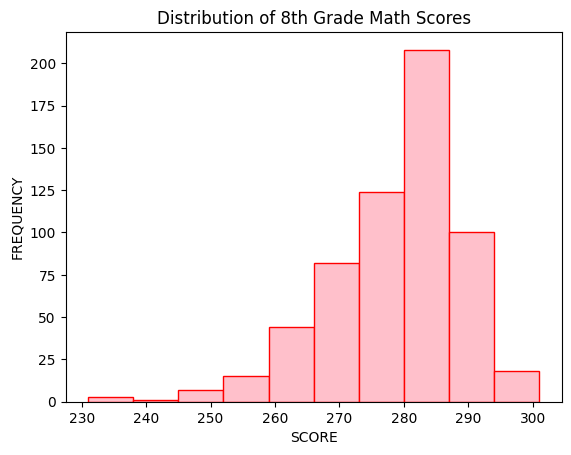

In [80]:
# @@@ 6

df.AVG_MATH_8_SCORE.plot.hist(title="Distribution of 8th Grade Math Scores", edgecolor="red", color= "pink")
plt.xlabel('SCORE')
plt.ylabel('FREQUENCY')

#In the 8th grade, students, on average, had a score of ~285. The frequency of such a score is 200. 

**<CAPTION FOR VIZ 1>**

In the 8th grade, students, on average, had a score of ~285. The frequency of such a score is 200. 

**Visualization 2**

Text(0.5, 1.0, '8th Grade Math Score Over Time')

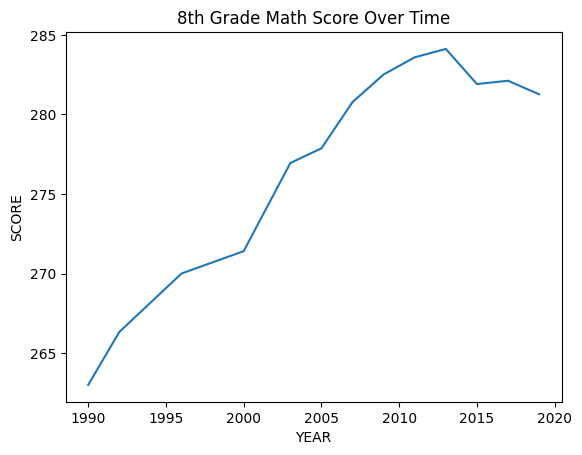

In [81]:
# @@@ 7

df.groupby('YEAR')["AVG_MATH_8_SCORE"].mean().plot()
plt.ylabel('SCORE')
plt.title('8th Grade Math Score Over Time')

**<CAPTION FOR VIZ 2>**

There is a steady increase from 1990-2013 in 8th Grade Math Scores, however, since 2013, the math scores have been steadily decreasing. 

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [90]:
from sklearn.model_selection import train_test_split

In [94]:
# @@@ 8

X = df[['ENROLLED_8','AVG_READING_8_SCORE','AVG_MATH_4_SCORE']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']

In [95]:
# @@@ 9 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=30, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [96]:
# @@@ 10
# import your sklearn class here

from sklearn.linear_model import LinearRegression


In [97]:
# @@@ 11
# create your model here
model = LinearRegression()

In [98]:
model.fit(X_train, y_train)

LinearRegression()

In [106]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [102]:
# @@@ 12

print("How well the linear regression model fits the data: ", model.score(X_test, y_test))
print("The Mean Error: ", np.mean(model.predict(X_test)-y_test))


How well the linear regression model fits the data:  0.9050599150147078
The Mean Error:  -0.37351837990652637


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Index(['ENROLLED_8', 'AVG_READING_8_SCORE', 'AVG_MATH_4_SCORE'], dtype='object')


Text(0.5, 1.0, 'Model Behavior On Training Set')

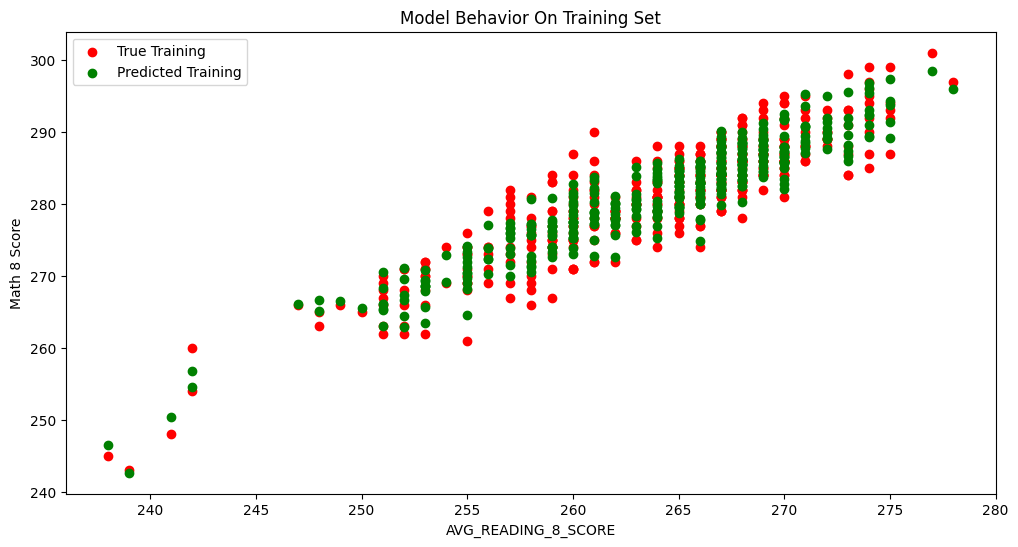

In [109]:
# @@@ 13

col_name = 'AVG_READING_8_SCORE'


f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Math 8 Score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

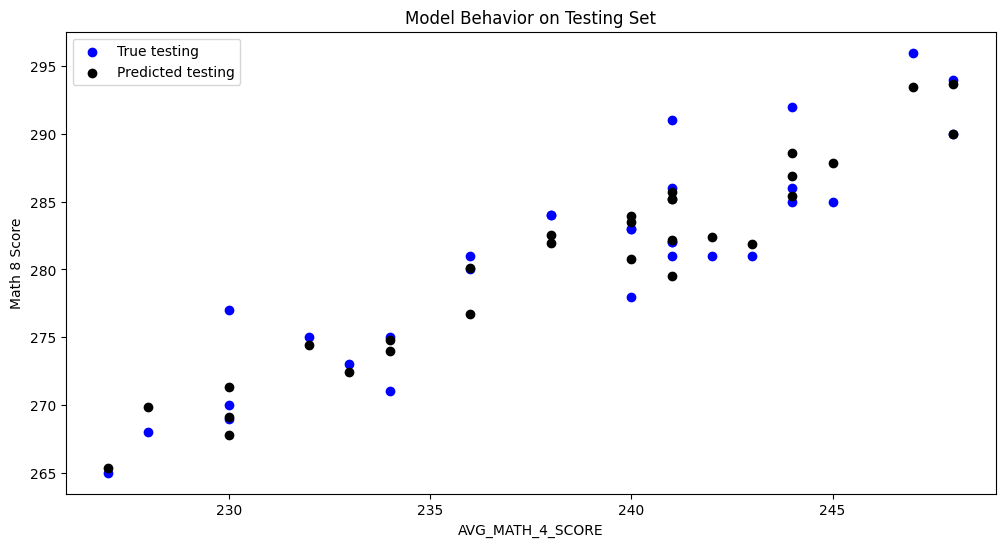

In [110]:
# @@@ 14


col_name = 'AVG_MATH_4_SCORE'


f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Math 8 Score')
plt.title("Model Behavior on Testing Set")